# The Sparks Foundation - Data Science and Business Analytics Internship
## GRIP August 21 
## Task - 1
  
# Submitted By - Sanket Mathur

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

# Loading and analysing the dataset

In [2]:
df = pd.read_csv('student_scores - student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can interpret from the model, there are 25 observations and 2 columns  
There are no null values for us to deal with as well  
**Scores** being the target column and **Hours** being the feature

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


For the feature "Hours", we can see that it has a mean of 5 hours while the values ranges from 1.1 to 9.2  
Plotting the feature using a box plot, we can see that the values are equally distributed through out the dataset  
We can also interpret it as the distribution is close to a normal distribution

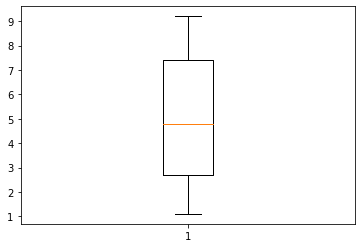

In [5]:
plt.boxplot(df.Hours);

# Visualization of relationship in the dataset

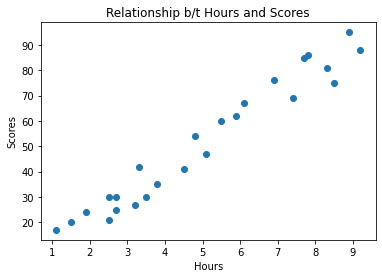

In [6]:
plt.scatter(df.Hours, df.Scores)
plt.title('Relationship b/t Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

From the plot, we can observe that there is a linear relationship present between the feature and the target  
We also only have one feature and hence there is no need for normalization or feature transformation.

# Fitting the data to Linear Regression Model

First we need to split the dataset into training and validation sets  
We do this to approximate the ability of our model to generalize

In [7]:
X, y = df.Hours, df.Scores
X = X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((20, 1), (5, 1), (20,), (5,))

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

No that we have our model training on the training set,  
We can go ahead and check the performance of our model.  
Here I have used the root mean squared error for the purpose

In [10]:
y_pred_train = lr.predict(X_train)
mse_train = MSE(y_train, y_pred_train)
rmse_train = mse_train**(1/2)

y_pred_test = lr.predict(X_test)
mse_test = MSE(y_test, y_pred_test)
rmse_test = mse_test**(1/2)

print('Training Root Mead Sq. Error: {:.2f}'.format(rmse_train))
print('Testing Root Mead Sq. Error: {:.2f}'.format(rmse_test))

Training Root Mead Sq. Error: 5.44
Testing Root Mead Sq. Error: 5.23


Since we are getting the RMSE of about 5 on the training set,  
Our model is fitting the data quite well  
Now let's see the performance of our model through a plot 

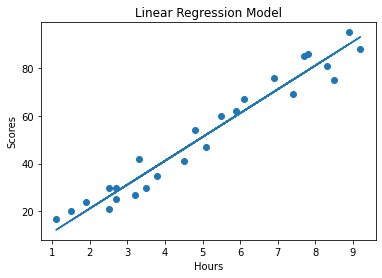

In [11]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X))

plt.title('Linear Regression Model')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

The plot shows that our model is able to fit our dataset quite well.  
We can also check the values of coefficient and intercept that our model has calculated

In [12]:
print('Coefficient: {:.2f}\nIntercept: {:.2f}'.format(lr.coef_[0], lr.intercept_))

Coefficient: 9.97
Intercept: 1.29


One flaw of using our model is it will predict above 100 scores after a define value of study hours  
For resolving this, we can create a function and resolve all these issues

In [13]:
def predict_score(hours):
    """Returns the score predicted for number of hours one study or -1 in case of an invalid input"""
    if hours > 24.0:
        return -1
    return min(round(lr.predict(np.array([[hours]]))[0]), 100)

Predicting for some example values

In [14]:
for i in [2, 6, 9, 12, 16]:
    print('Hours: {}\tPredicted Score: {}'.format(i, predict_score(i)))

Hours: 2	Predicted Score: 21
Hours: 6	Predicted Score: 61
Hours: 9	Predicted Score: 91
Hours: 12	Predicted Score: 100
Hours: 16	Predicted Score: 100
